<a href="https://colab.research.google.com/github/Shaharzanzuri/BasicDeepLearningMid1/blob/main/Shahar__of_mid_sem_bodl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mid-semester assignment Part 1 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please upload it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1:
<br>
Student 2:

## Fashion MNIST
Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>



Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

<br>

# Goodluck!

#Neural Network in plain NumPy

## Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix


## Load Dataset

In [ ]:

# Load Dataset
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)


## Data preprocessing (10%)

### Feature scaling

In [ ]:
# Feature scaling
examples = y.shape[0]
y = y.astype(int)
X1 = X / 255
X1 = X1.T
print(X1.shape)

(784, 70000)


### Select two classes

In [ ]:
# Select two classes (Pullover and Coat)
chosen_classes = [2, 4]
indices = np.isin(y, chosen_classes)
X1, y = X1[:, indices], y[indices]
y = (y == 4).astype(int).reshape(1, -1)  # Convert Coat to 1 and Pullover to 0


Split the data into Train set and Test set

In [ ]:

# Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)
from sklearn.utils import shuffle

X1, y = shuffle(X1.T, y.T)
X1, y = X1.T, y.T

split_index = int(0.8 * X1.shape[1])
X_train, X_test = X1[:, :split_index], X1[:, split_index:]
Y_train, Y_test = y[:, :split_index], y[:, split_index:]


### Test yourself

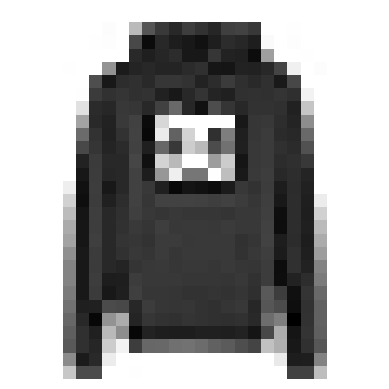

0

In [ ]:
# Test yourself (Check that the classes you have selected are actually displayed)
%matplotlib inline
from numpy import random

i = random.randint(100)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[0, i]

## Activation functions (10%)

In [ ]:
# Activation functions (10%)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Loss function (20%)
BCE Loss function captures the intuition that the neural network should pay a high penalty(Loss→∞) when the estimated probability, with respect to the training example’s label, is completely wrong. On the other hand, the Loss should equal zero(Loss=0) when the estimated probability, with respect to the training example’s label, is correct. Simply put, the BCE Loss should equal zero in only two instances:<br>
* if the example is positively labeled(y=1) the neural network model should be completely sure that the example belongs to the positive class i.e p̂=1.
* if the example is negatively labeled(y=0) the neural network model should be completely sure that the example does not belong to the positive class i.e p̂=0.

<b> When we work with a computer, there are very high values or very low values that it cannot handle and that could cause the system to crash. <br>In order to overcome the case where the function returns values that strive for infinity you will need to understand which range of values causes the logarithm to return inf \ -inf and handle this within the function. </b>

In [ ]:
# Loss function (20%)
def log_loss(y_hat, y):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''
    return - (y * np.log(y_hat + 1e-9) + (1 - y) * np.log(1 - y_hat + 1e-9))


## NN Hyper Parameters

In [ ]:
# NN Hyper Parameters
input_layer = X_train.shape[0]  # 28X28 = 784
hidden_layer = 64
learning_rate = 0.01
epochs = 1000

## Weight and Bias Initialization

In [ ]:
# Weight and Bias Initialization
W1 = np.random.randn(hidden_layer, input_layer) * 0.01
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer) * 0.01
b2 = np.zeros((1, 1))

print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(64, 784)
(64, 1)
(1, 64)
(1, 1)


## Training (30%)

In [ ]:
# Training
X = X_train
Y = Y_train
loss_list = []
epoch_list = []
numOfTraining = X_train.shape[1]

for i in range(epochs):
    avg_epoch_loss = 0
    for j in range(numOfTraining):
        # Forward propagation
        Z1 = np.dot(W1, X[:, j].reshape(-1, 1)) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)
        Yout = Y[:, j].reshape(-1, 1)

        # Compute loss
        loss = log_loss(A2, Yout)
        avg_epoch_loss += loss

        # Back propagation
        dZ2 = A2 - Yout
        dW2 = np.dot(dZ2, A1.T)
        db2 = dZ2

        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * A1 * (1 - A1)
        dW1 = np.dot(dZ1, X[:, j].reshape(1, -1))
        db1 = dZ1

        # Update weights
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

    avg_epoch_loss /= numOfTraining
    loss_list.append(avg_epoch_loss.item())  # Ensure scalar value is appended
    epoch_list.append(i)
    if i % 100 == 0:
        print("Epoch", i, "Loss:", avg_epoch_loss)


Epoch 0 Loss: [[0.00035538]]
Epoch 100 Loss: [[0.00030541]]
Epoch 200 Loss: [[0.00026723]]
Epoch 300 Loss: [[0.00023724]]
Epoch 400 Loss: [[0.00021311]]
Epoch 500 Loss: [[0.00019333]]
Epoch 600 Loss: [[0.00017682]]
Epoch 700 Loss: [[0.00016285]]
Epoch 800 Loss: [[0.00015088]]
Epoch 900 Loss: [[0.00014051]]


### Loss Visualization

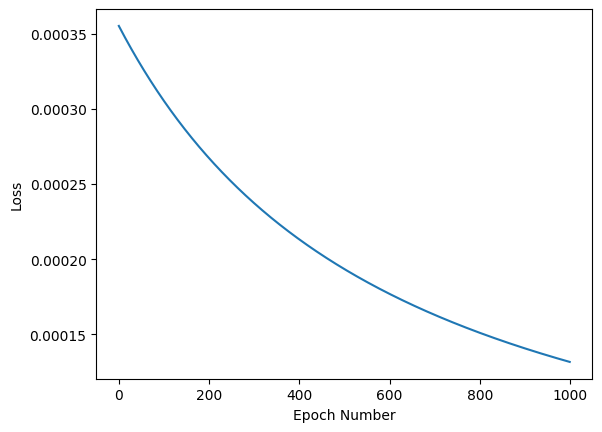

In [ ]:
# Loss Visualization for all 1000 elements
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)
plt.show()

## Results

### Test your performance (30%)

In [ ]:
# Test your performance (30%)
X = X_test
Y = Y_test

Z1 = np.dot(W1, X) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = (A2 > 0.5).astype(int)
labels = Y

# Check your predictions against the test's labels
print(confusion_matrix(predictions.flatten(), labels.flatten()))


[[1270  151]
 [ 122 1257]]


### Visualize the results

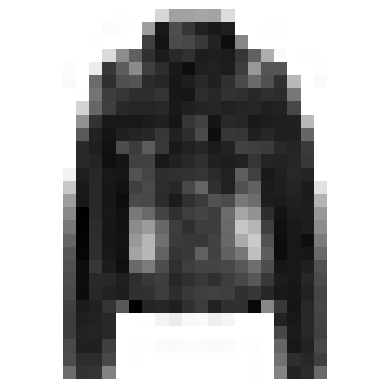

Real=1, Predicted=1


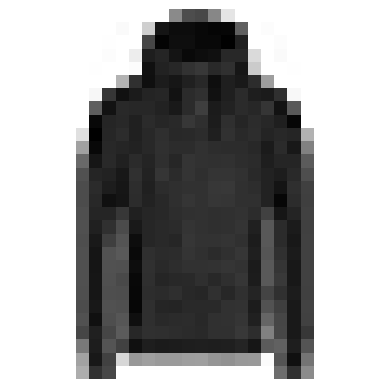

Real=1, Predicted=1


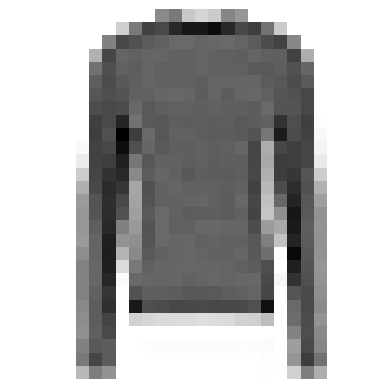

Real=0, Predicted=0


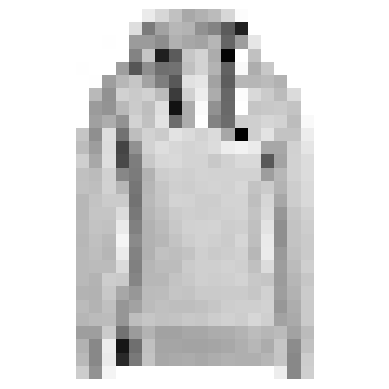

Real=0, Predicted=0


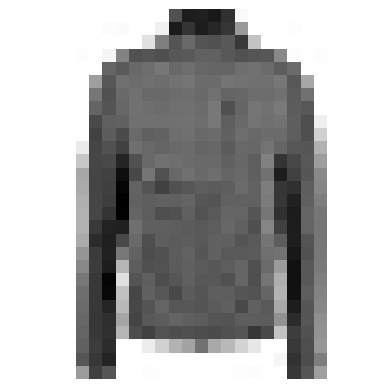

Real=1, Predicted=0


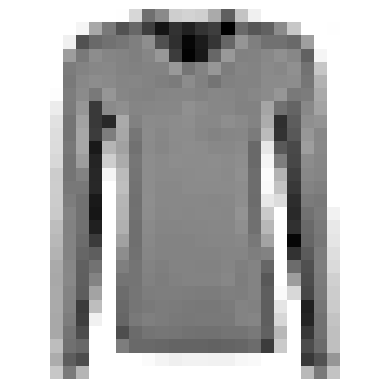

Real=0, Predicted=0


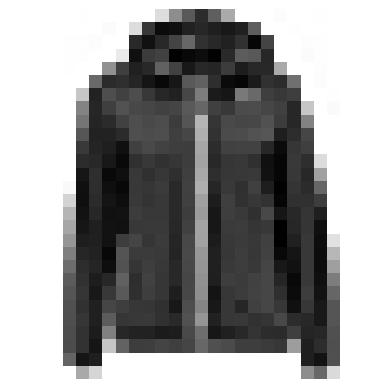

Real=1, Predicted=1


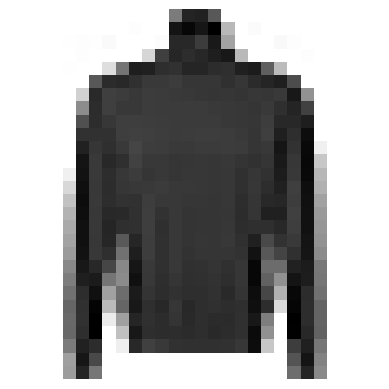

Real=0, Predicted=1


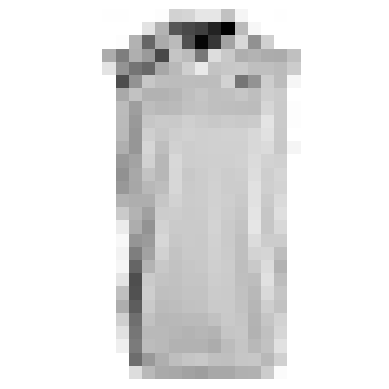

Real=0, Predicted=1


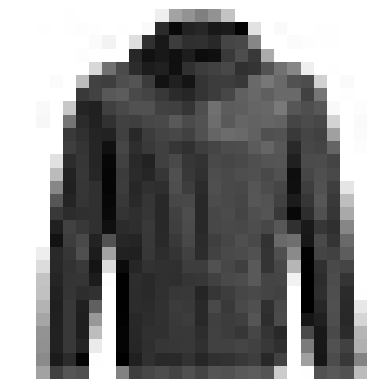

Real=1, Predicted=1


In [ ]:
%matplotlib inline
from numpy import random

for i in range(10):
    index = random.randint(X_test.shape[1])
    plt.imshow(X_test[:, index].reshape(28,28), cmap = matplotlib.cm.binary)
    plt.axis("off")
    plt.show()
    print(f"Real={Y_test[0, index]}, Predicted={predictions[0, index]}")